## ONLINE PAYMENT FRAUD DETECTION
- A QUANTUM ANALYTIC portfolio Project for Data Science Jan 2023 Cohort - By E. Abiola Ogunyinka


### Background
Blossom Bank also known as BB PLC is a multinational financial services group, that 
offers retail and investment banking, pension management, asset management, and 
payments services, headquartered in London, UK.
Problem:
Blossom Bank wants to build a Machine Learning model to predict online payment fraud.


### Data Dictionary:
The below column reference:
- • step: represents a unit of time where 1 step equals 1 hour
- • type: type of online transaction
- • amount: the amount of the transaction
- • nameOrig: customer starting the transaction
- • oldbalanceOrg: balance before the transaction
- • newbalanceOrig: balance after the transaction
- • nameDest: recipient of the transaction
- • oldbalanceDest: initial balance of recipient before the transaction
- • newbalanceDest: the new balance of the recipient after the transaction
- • isFraud: fraud transaction

### Importing Neccessary Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r'C:\Users\hp\Desktop\Data Analysis Training\Python\QA Python Portfolio Project Work\Online Payment Fraud\Online Payment Fraud Detection.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


#### Undertanding the Dataset

Checking the data structure

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [5]:
data.tail()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0
1048574,95,PAYMENT,11450.03,C1264356443,80584.95,69134.92,M677577406,0.00,0.00,0


In [6]:
data.keys()

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [7]:
data.shape

(1048575, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [9]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud'],
      dtype='object')

In [10]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00


#### I will like to rename a few colums for clarity

In [11]:
fraud = data.rename(columns={'nameOrig': 'sender_name', 'oldbalanceOrg': 'sendbalance', 'newbalanceOrig': 'send_newbalance', 'nameDest': 'reciever_name', 'oldbalanceDest': 'recieverbalance', 'newbalanceDest': 'reciever_newbalance'})
fraud

,step,type,amount,sender_name,sendbalance,send_newbalance,reciever_name,recieverbalance,reciever_newbalance,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0


#### Checking for missing values

In [12]:
fraud.isna().sum()

step                   0
type                   0
amount                 0
sender_name            0
sendbalance            0
send_newbalance        0
reciever_name          0
recieverbalance        0
reciever_newbalance    0
isFraud                0
dtype: int64

#### Visualizing if there are missing values with heat map

<AxesSubplot:title={'center':'Missing Values'}>

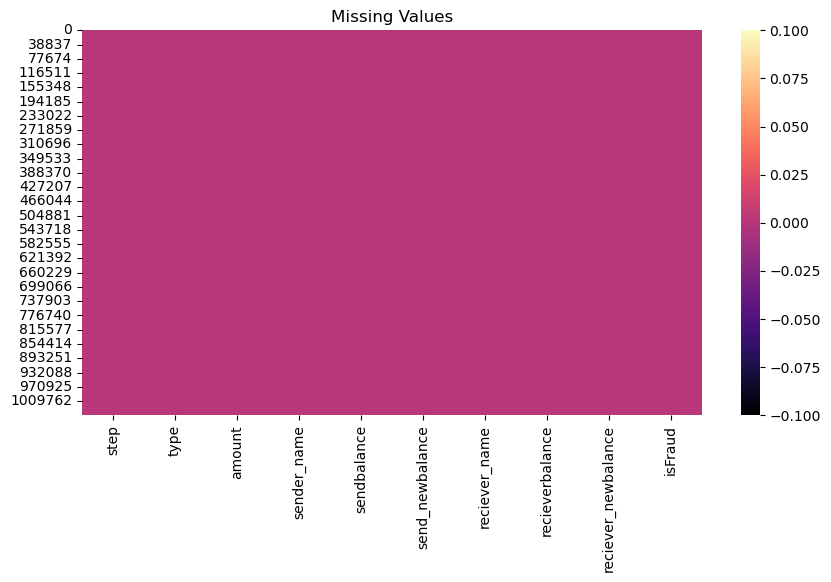

In [13]:
plt.figure(figsize = (10, 5))
plt.title('Missing Values')
sns.heatmap(fraud.isnull(), cbar = True, cmap = 'magma')

## EDA
Since there are no missing values and from the checks done, I will now proceed to Analysis of this Data set

#### We will therefore be doing the following Analysis
- Univariate
- Bivariate 
- Multivariate
#### Univariate

In [14]:
# I will like to know the type of transaction a constomer performs

count_type = fraud['sender_name'].value_counts()
count_type

C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C1883668225    1
C1264356443    1
Name: sender_name, Length: 1048317, dtype: int64

In [15]:
# Now I am also intrested in the number of times the recipeint recieved payments

count_type = fraud['reciever_name'].value_counts()
count_type

C985934102     98
C1286084959    96
C1590550415    89
C248609774     88
C665576141     87
               ..
M382871047      1
M322765556      1
M1118794441     1
M1127250627     1
M677577406      1
Name: reciever_name, Length: 449635, dtype: int64

In [16]:
fraud.amount.max()

10000000.0

### Observation
From the forgoing we will see that the Maximum Amount either recieved or paid out is 10 Million pounds.
- Let us now look into how this moneies were paid out or probably stolen. 

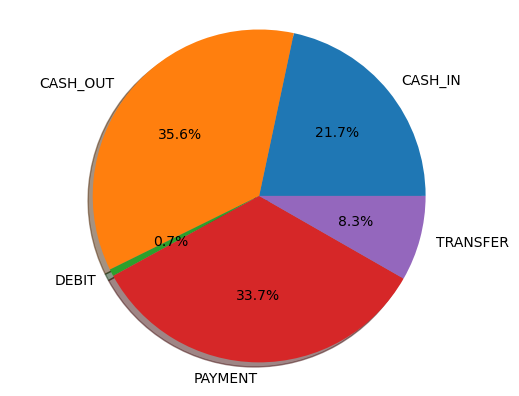

In [17]:
#Checking the distribution of the type of transactions made

labels = fraud['type'].astype('category').cat.categories.tolist()
counts = fraud['type'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### Observation
We will notice that the overall transactions in this bank are over the counter transaction and they are form of withdrawals "Cash Out"

In [18]:
#Looking to get how many times a particular type of transaction was carried out. 

data.type.value_counts()

CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: type, dtype: int64

In [19]:
#Which customers did the transactions? by top 10
top_ten = fraud.groupby('sender_name').type.sum().sort_values(ascending=False)[:10]
top_ten

sender_name
C24957224      TRANSFERTRANSFER
C1378765159    TRANSFERTRANSFER
C813633808     TRANSFERTRANSFER
C940075559     TRANSFERTRANSFER
C1709295811     TRANSFERPAYMENT
C196315367      TRANSFERPAYMENT
C1077087409     TRANSFERPAYMENT
C495164373      TRANSFERPAYMENT
C192628069      TRANSFERPAYMENT
C1039623203     TRANSFERPAYMENT
Name: type, dtype: object

In [20]:
#Checking the average amount that was in transaction
fraud['amount'].mean()

158666.9755271443

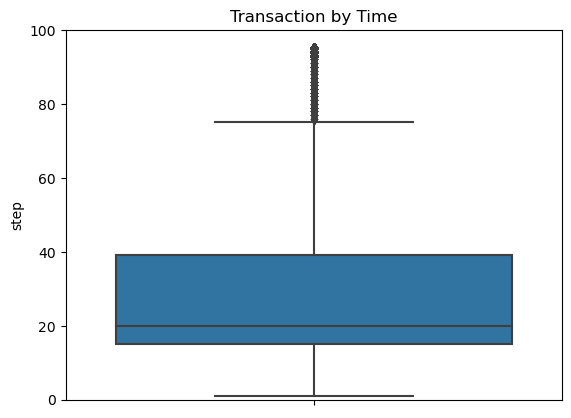

In [21]:
sns.boxplot(y=fraud.step)
plt.title('Transaction by Time')
plt.ylim(0,100)
plt.show()

### Observation
It is noticed that the median is 20 while the maximum Q3 is 40 and the Minimum Q1 is about 10, it is safe to say average transaction by time is 20 times that is about 20 hours.

#### Now we will be looking at the Amount in the transaction thus far

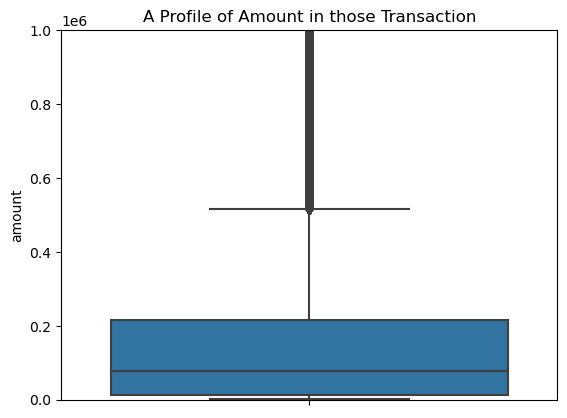

In [22]:
sns.boxplot(y=fraud.amount)
plt.title('A Profile of Amount in those Transaction')
plt.ylim(0,1000000)
plt.show()

### Observation
This gives us about 0.05 meaning the money transacted is below the bank reserve
#### Now Lets look at the FRAUD level

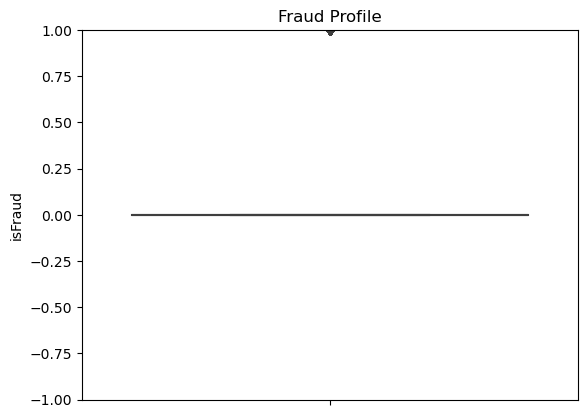

In [23]:
sns.boxplot(y=data.isFraud)
plt.title('Fraud Profile')
plt.ylim(-1,1)
plt.show()

### Multivariate

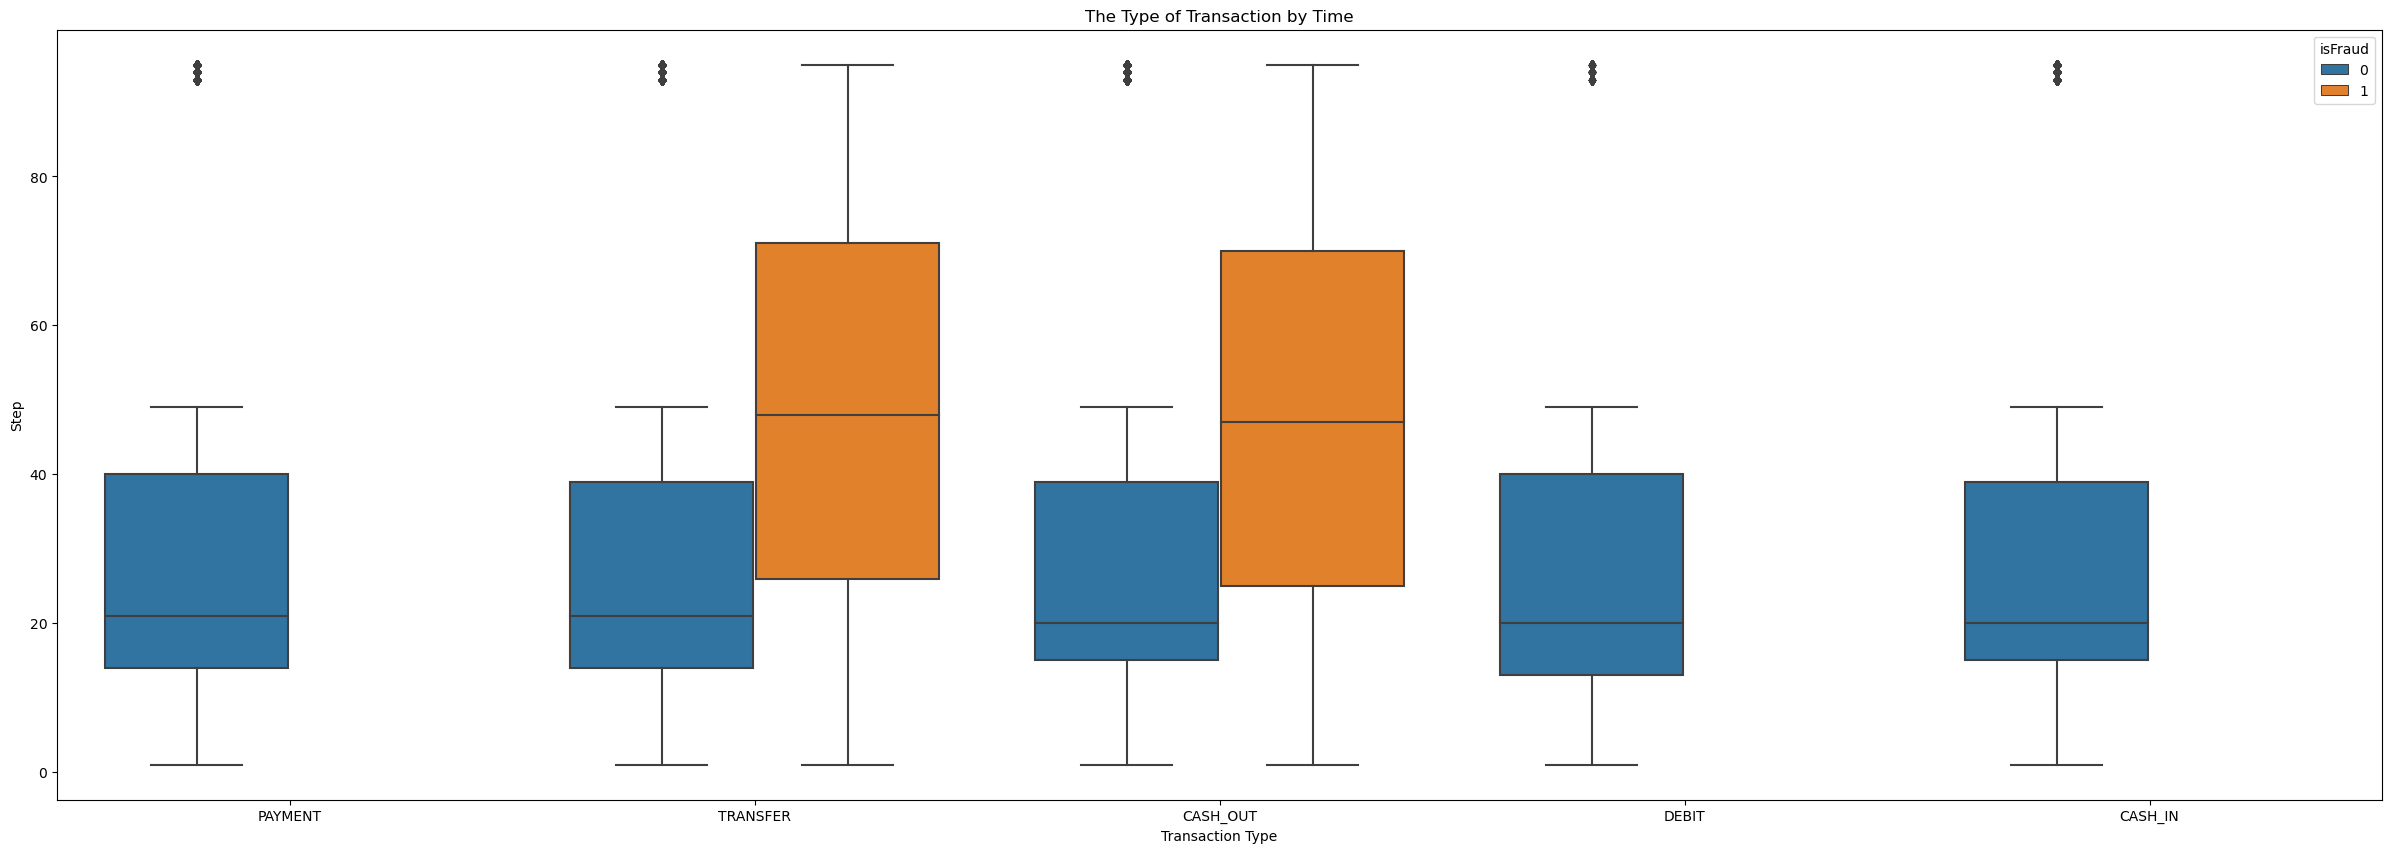

In [24]:
# Visualizing Property Type, Furnished by Price using box plot

plt.figure(figsize = (30, 10))
sns.boxplot(x = 'type', y = 'step', data = fraud, hue = 'isFraud')
plt.title('The Type of Transaction by Time')
plt.xlabel('Transaction Type')
plt.ylabel('Step')
plt.show()

### Observation
If fraud equals 1 then there seem to be a sign that some transaction were not very clean give this box plot result. Fraud is detected mostly with the transfers and cash out

#### Using Bar Chart Let us see amount in transaction that is fraud.

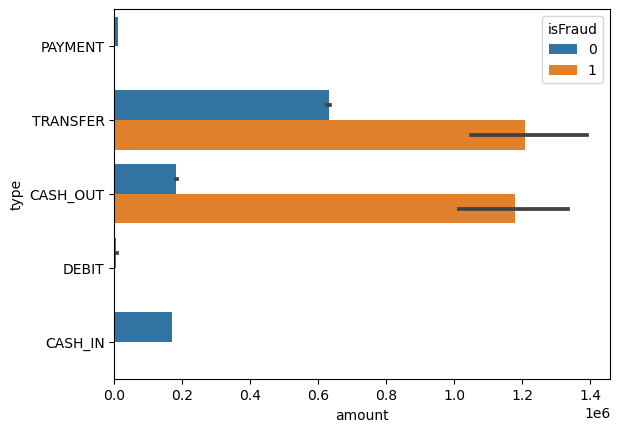

In [25]:
sns.barplot(x='amount', y='type', hue= 'isFraud', data=fraud)
plt.show()

#### Observation
We see here that way abouve a million was taken by fraud via Transfer and CashOut

(0.0, 2000000.0)

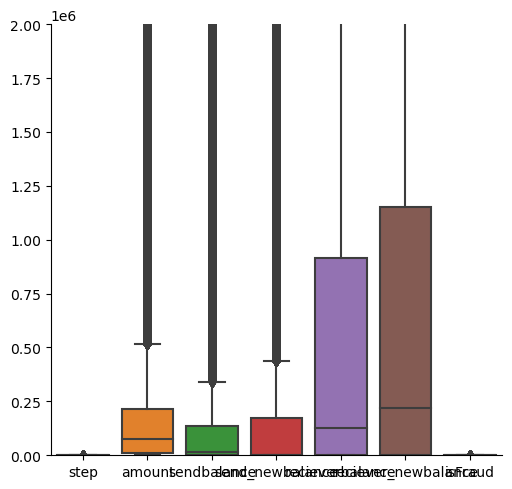

In [26]:
sns.catplot(data=fraud,kind='box')

plt.ylim(0,2000000)

<Figure size 3000x1000 with 0 Axes>

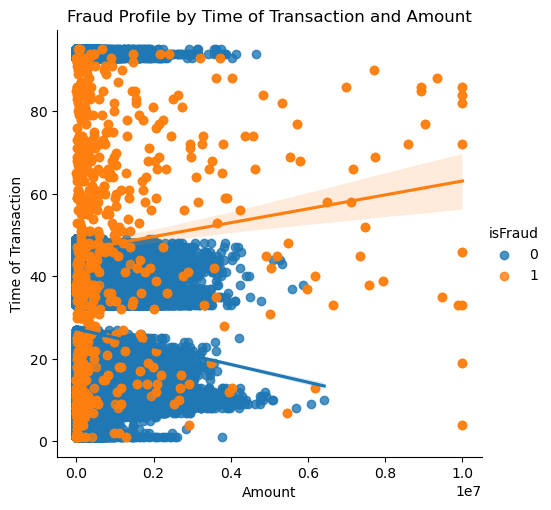

In [27]:
plt.figure(figsize = (30, 10))
sns.lmplot(x = 'amount', y = 'step', data = fraud, hue = 'isFraud')
plt.title('Fraud Profile by Time of Transaction and Amount')
plt.xlabel('Amount')
plt.ylabel('Time of Transaction')
plt.show()

<Figure size 3000x1000 with 0 Axes>

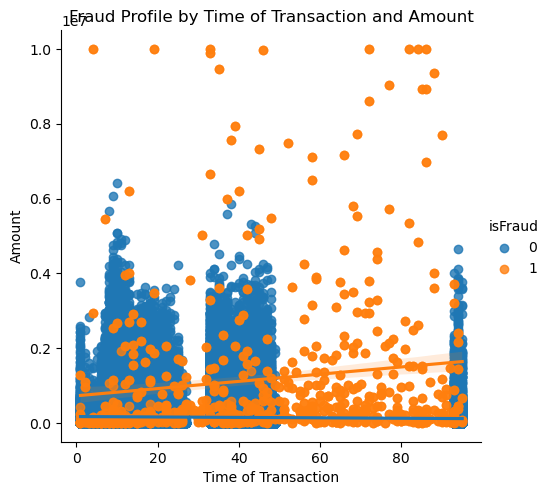

In [28]:
plt.figure(figsize = (30, 10))
sns.lmplot(x = 'step', y = 'amount', data = fraud, hue = 'isFraud')
plt.title('Fraud Profile by Time of Transaction and Amount')
plt.xlabel('Time of Transaction')
plt.ylabel('Amount')
plt.show()

### Multivariate

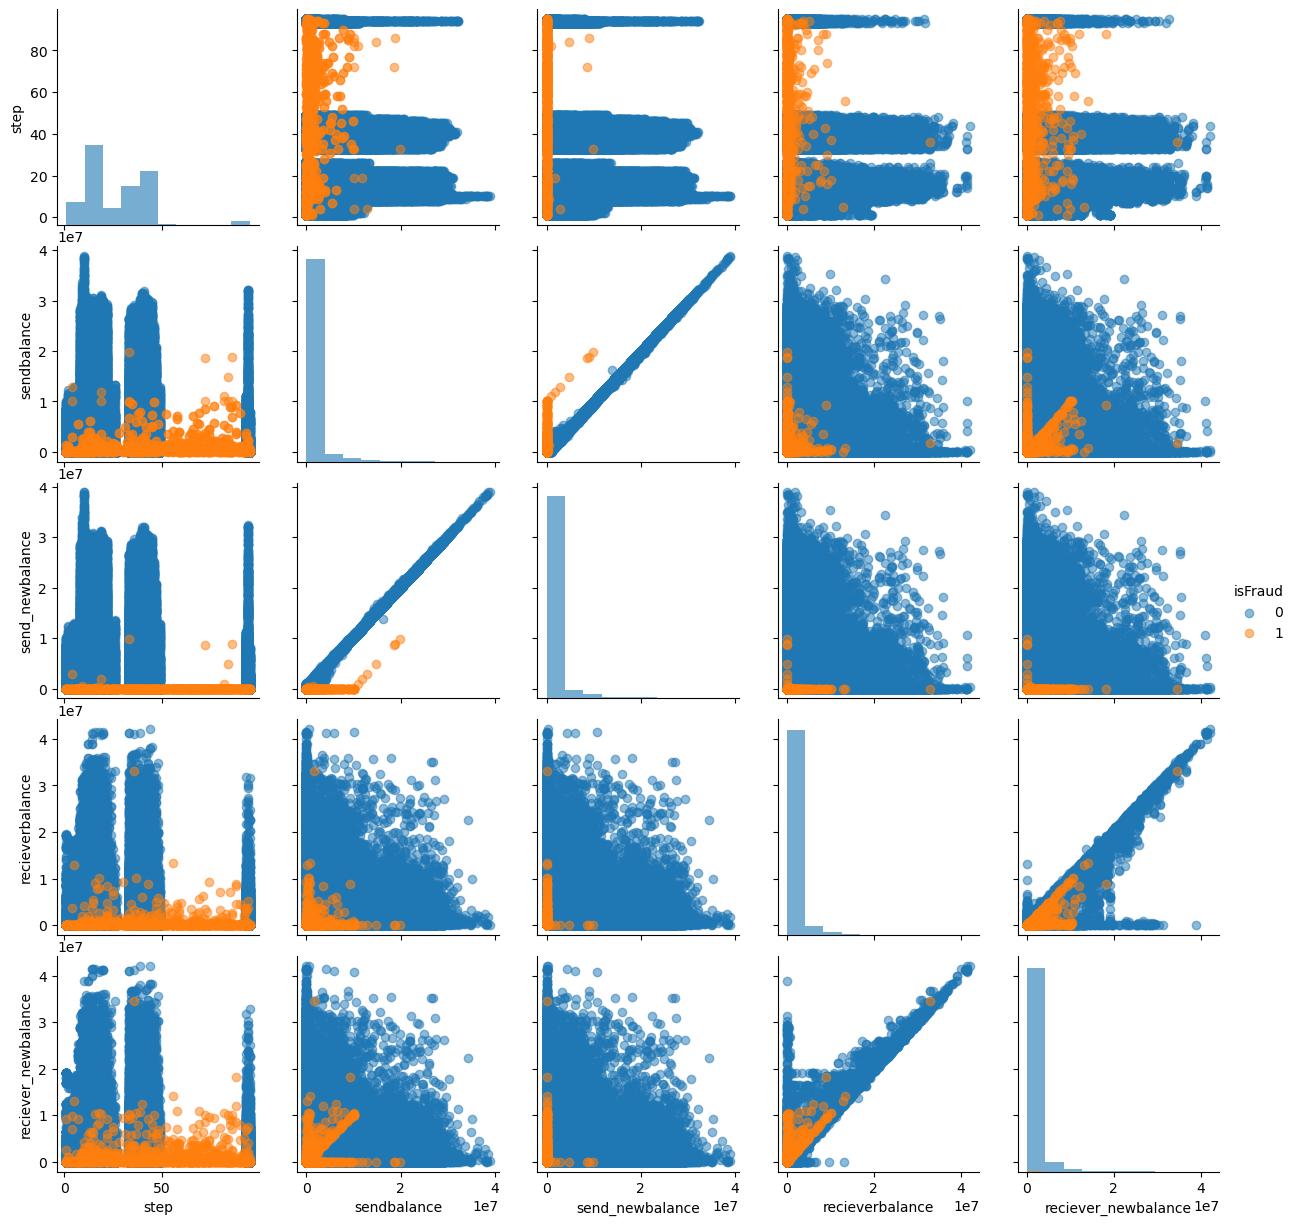

In [29]:
#Visualising the spread of fraud variables across the dataset

Online_Payment_layout = sns.PairGrid(fraud, vars = ['step', 'sendbalance', 'send_newbalance', 'recieverbalance', 'reciever_newbalance'], hue = 'isFraud')

Online_Payment_layout.map_diag(plt.hist, alpha = 0.6)
Online_Payment_layout.map_offdiag(plt.scatter, alpha = 0.5)
Online_Payment_layout.add_legend()

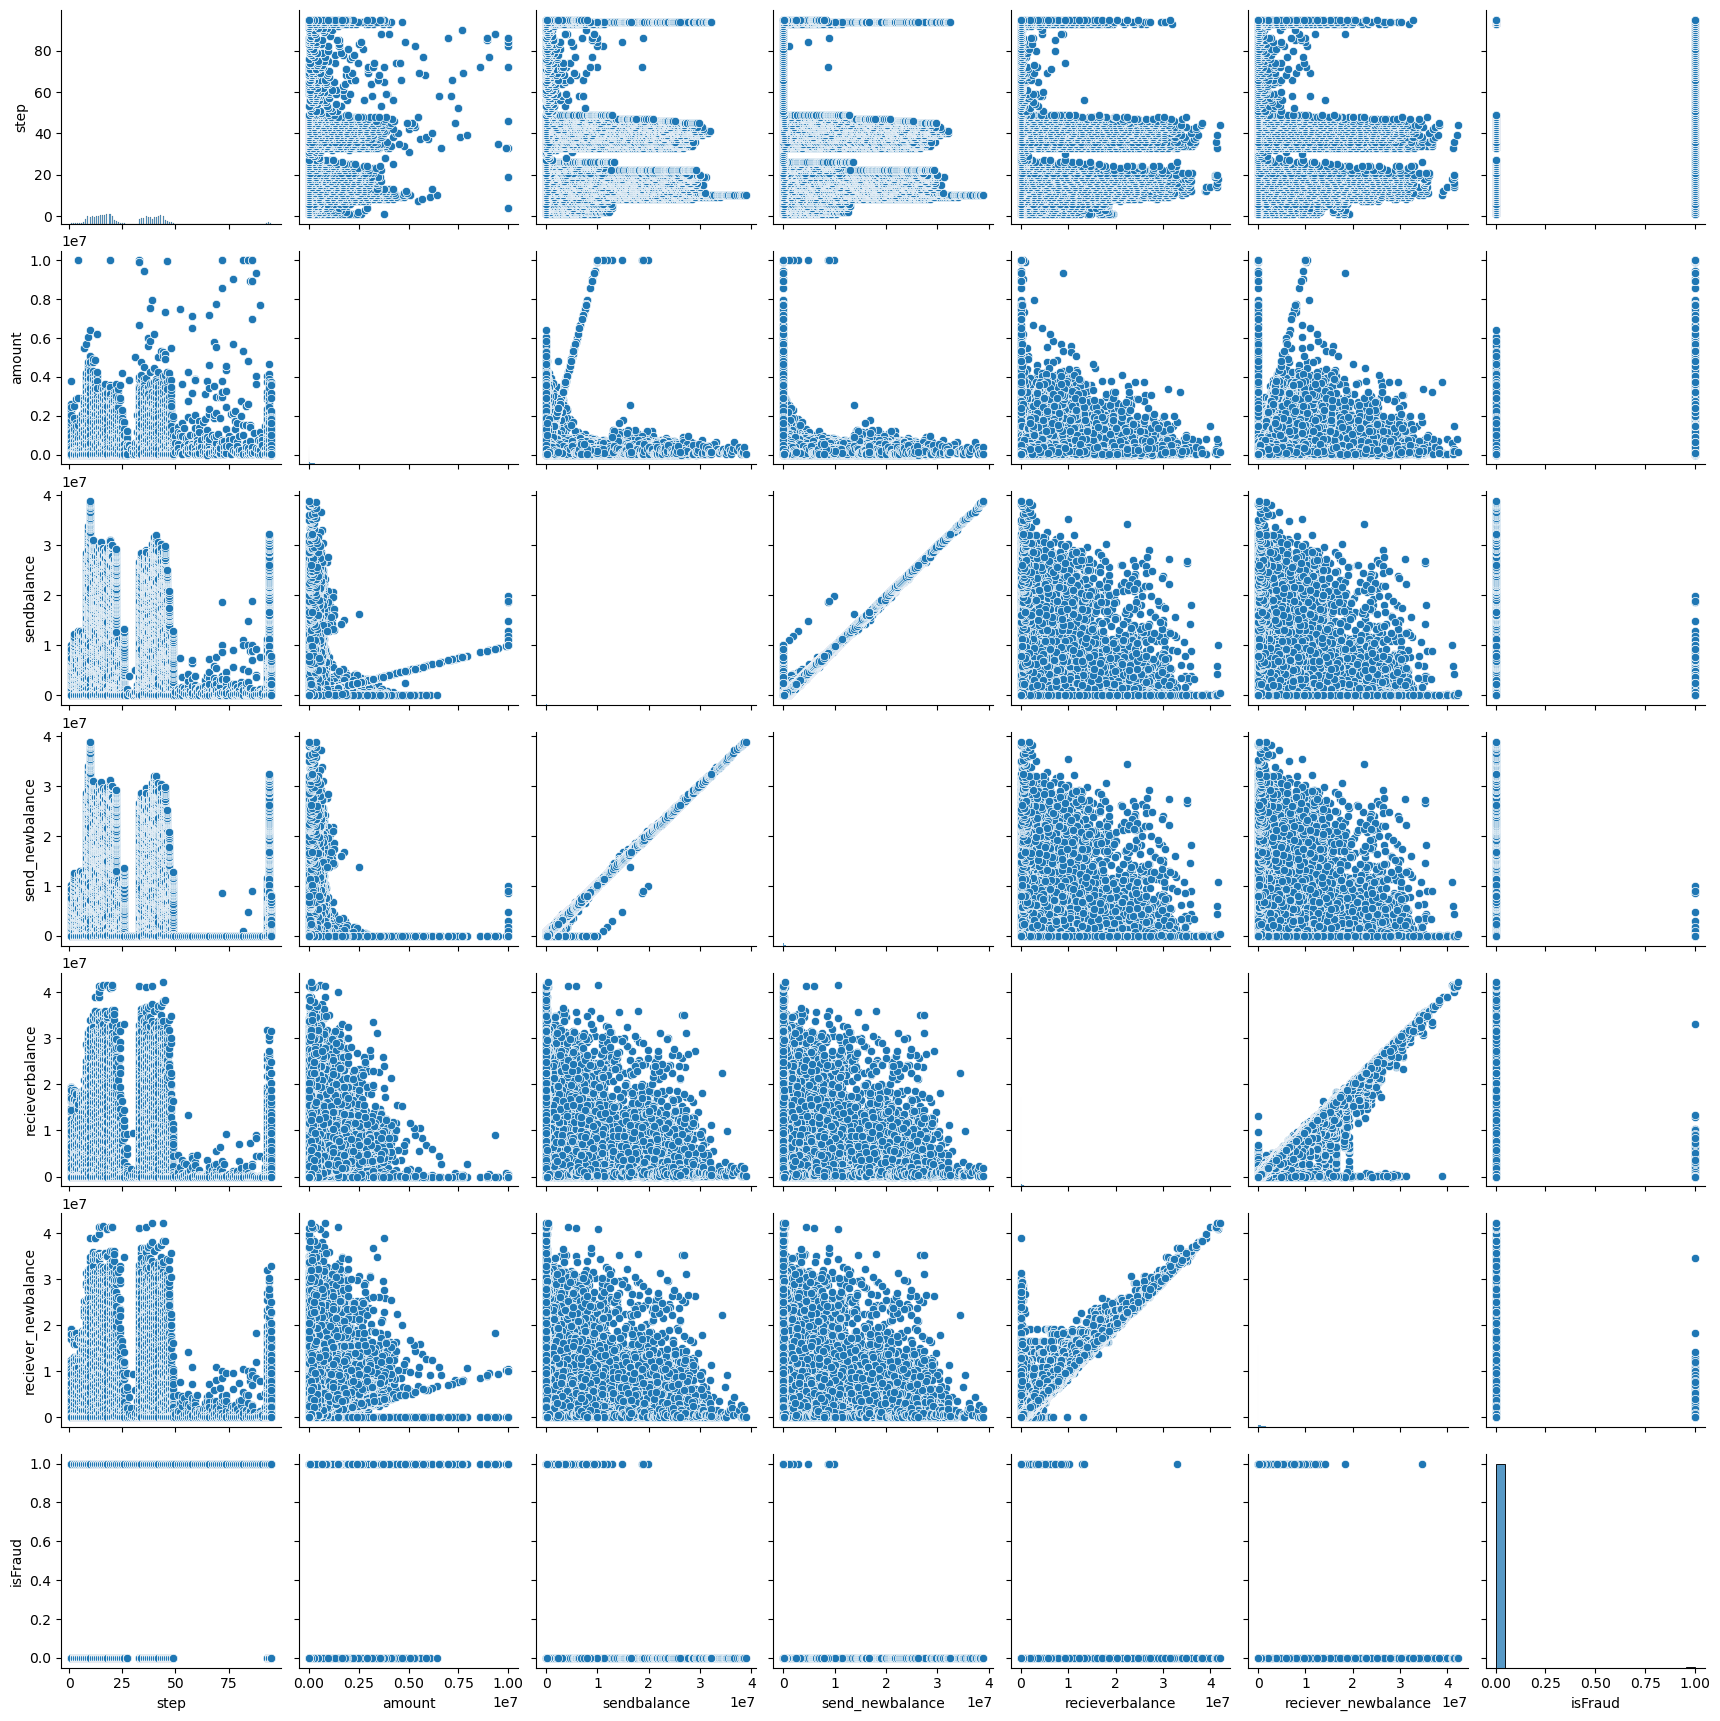

In [30]:
#Pair plot captures the relationship between two features. It captures the entire columns 
sns.pairplot(data = fraud)

<AxesSubplot:>

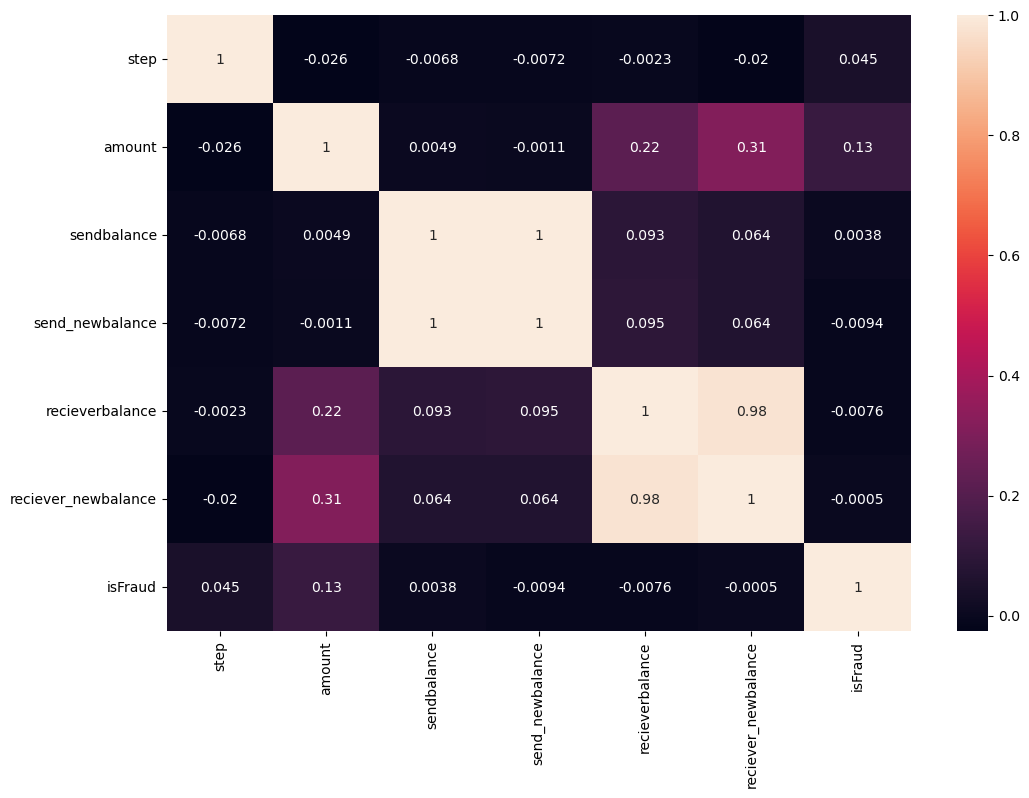

In [31]:
# Using correlation I will be using Hitmap

plt.figure(figsize = (12, 8))
corel = fraud.corr()
sns.heatmap(corel, annot = True)

#### Finaly lets look at the fraud distribution using pie chart.

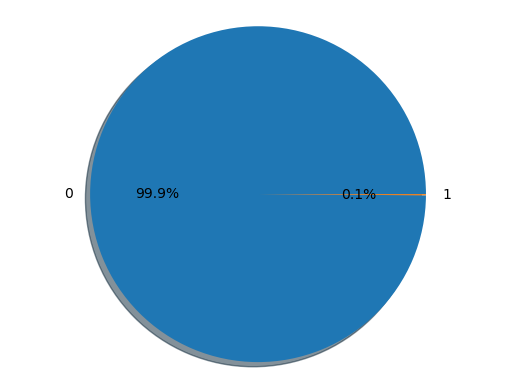

In [32]:
# Fraud Distribution

labels = fraud['isFraud'].astype('category').cat.categories.tolist()
counts = fraud['isFraud'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

### EDA Conclusion
From the overall, we have been able to see the transaction details of this bank by customers, type, time and the fraud transactions detected. it is obvious that the fraud distribution is 0.1% of the total transaction

### Preparing for Machine Learning

I will need to separate the Fraud transactions. 
- First we need to know the total trasaction that is fraud and not.
- Second separate them and get the statistical overview.
- Then we will create a separate column for them
- And we will go ahead to train the models.
- Finally test for acurracy

In [33]:
# Sepearating Fraudulent transaction from non fraudulent

Fraud_Transaction = fraud[data.isFraud ==1]
Not_Fraud_Transaction = fraud[data.isFraud ==0]

In [34]:
print('Fraudulent Transactions: {}'.format(len(Fraud_Transaction)))
print('Not Fraudulent Transactions: {}'.format(len(Not_Fraud_Transaction)))

Fraudulent Transactions: 1142
Not Fraudulent Transactions: 1047433


#### You will recall that the total row for dataset is 1048575, so here we have 1047433 of those transaction not Fraud and the 1142 left seem to be fraud related. It is safe to say that the dataset shows a Heavy Class-Imbalance. The margine is too wide. Since the purpose of this projectis to protect fraudulent transactions for this bank, the data we will be using should be the one that is fraud ridden. It will be safe then to build the model soley on the fraudulent transactions. Before then: 

- Let us then see the Statistical nature of transactions that are not fraud.

In [35]:
Not_Fraud_Transaction.amount.describe()

count    1.047433e+06
mean     1.575397e+05
std      2.541883e+05
min      1.000000e-01
25%      1.213487e+04
50%      7.621497e+04
75%      2.134928e+05
max      6.419835e+06
Name: amount, dtype: float64

In [36]:
# The statistical nature of Fraudulent Transactions.

Fraud_Transaction.amount.describe()

count    1.142000e+03
mean     1.192629e+06
std      2.030599e+06
min      1.190000e+02
25%      8.607017e+04
50%      3.531794e+05
75%      1.248759e+06
max      1.000000e+07
Name: amount, dtype: float64

In [37]:
#Comparing both class of transactions
fraud.groupby('isFraud').mean()

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance
isFraud,,,,,,
0,26.942944,1.575397e+05,8.736338e+05,894746.395080,978732.769117,1.114237e+06
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


### Undersampling
- Undersampling is a resampling scheme where you modify the distribution of a variable in your dataset by artificially decreasing the number of observations that take on a particular value or range of values for that variable.


As I mentioned earlier I now want to build a sample dataset containing the same distribution of transactions that are Not Fraudulent and also Fraudulent transactions. This should be able to take care of the class-imbalance and help our machine learning model predictions better.

Remeber we want to build a model that detects Fraud, I will therefore base our sampling on the number of transactions classed as fraudulent in our original dataset which is 1142.


In [38]:
Non_Fraud_Sample = Not_Fraud_Transaction.sample(n=1142)

### Joining 
Next is joining the new dataset that are not fraud created above with those that are fruad in our original dataset

In [39]:
new_fraud = pd.concat([Non_Fraud_Sample, Fraud_Transaction], axis=0)

In [40]:
new_fraud.head()

,step,type,amount,sender_name,sendbalance,send_newbalance,reciever_name,recieverbalance,reciever_newbalance,isFraud
272514,15,CASH_OUT,74325.92,C1878879021,0.0,0.00,C1420934487,336045.71,410371.64,0
480570,19,CASH_OUT,153174.76,C1022201147,21130.0,0.00,C236436766,0.00,192719.10,0
234985,14,PAYMENT,4986.33,C1811344541,506341.0,501354.67,M1768464044,0.00,0.00,0
916428,43,PAYMENT,10919.07,C51708073,11705.0,785.93,M49118781,0.00,0.00,0
1026333,48,PAYMENT,2771.34,C1170896318,15469.0,12697.66,M982378833,0.00,0.00,0


In [41]:
new_fraud.tail()

,step,type,amount,sender_name,sendbalance,send_newbalance,reciever_name,recieverbalance,reciever_newbalance,isFraud
1047888,95,CASH_OUT,56745.14,C526144262,56745.14,0.0,C79051264,51433.88,108179.02,1
1048221,95,TRANSFER,33676.59,C732111322,33676.59,0.0,C1140210295,0.00,0.00,1
1048222,95,CASH_OUT,33676.59,C1000086512,33676.59,0.0,C1759363094,0.00,33676.59,1
1048323,95,TRANSFER,87999.25,C927181710,87999.25,0.0,C757947873,0.00,0.00,1
1048324,95,CASH_OUT,87999.25,C409531429,87999.25,0.0,C1827219533,0.00,87999.25,1


#### It apears we have a joined dataset but then let us check further to see the size of the dataset

In [42]:
new_fraud['isFraud'].value_counts()

0    1142
1    1142
Name: isFraud, dtype: int64

In [43]:
new_fraud.shape

(2284, 10)

In [44]:
# I will also like to see if this dataset does not deviate significantly from our original dataset
new_fraud.groupby('isFraud').mean()

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance
isFraud,,,,,,
0,26.763573,1.475229e+05,8.381303e+05,861483.789623,832598.687163,9.606045e+05
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


In [45]:
fraud.groupby('isFraud').mean()

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance
isFraud,,,,,,
0,26.942944,1.575397e+05,8.736338e+05,894746.395080,978732.769117,1.114237e+06
1,48.272329,1.192629e+06,1.218636e+06,33944.321208,452866.124527,1.077940e+06


### Observation
If you compare to the above statistical analysis, there  is no imbalance as the records are still the same but the fraud detection margin have been closed. It is then safe to conclude that this dataset can now be trained which machine learning algorythms.

## MACHINE LEARNING PROCEDURES
,
We have colums with categorical variables such as 'type' 'Sender_Name' and 'Reciever_Name' those has to be converted before we can train our model prpperly. 

#### Using ONE-HOT ENCODING

This is used to convert columns with integers to float. 

Then, we will set the target and train our models

#### Importing One-Hot Encoder

In [46]:
from sklearn.preprocessing import OneHotEncoder

In [47]:
#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore', sparse=False, drop=None,)



In [48]:
#perform one-hot encoding on 'type' column 
encoder_df =  pd.get_dummies(new_fraud, columns=['type','sender_name','reciever_name'], prefix=['type','sender_name','reciever_name'])


In [49]:
encoder_df

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,reciever_name_M948731088,reciever_name_M949757680,reciever_name_M95146111,reciever_name_M956235548,reciever_name_M958102013,reciever_name_M981876743,reciever_name_M982378833,reciever_name_M985529636,reciever_name_M985599415,reciever_name_M995731548
272514,15,74325.92,0.00,0.00,336045.71,410371.64,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
480570,19,153174.76,21130.00,0.00,0.00,192719.10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
234985,14,4986.33,506341.00,501354.67,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916428,43,10919.07,11705.00,785.93,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026333,48,2771.34,15469.00,12697.66,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,56745.14,56745.14,0.00,51433.88,108179.02,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048221,95,33676.59,33676.59,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048222,95,33676.59,33676.59,0.00,0.00,33676.59,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048323,95,87999.25,87999.25,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
encoder_df.shape

(2284, 4557)

In [51]:
# Check result of one-hot encoding
encoder_df.head()

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,reciever_name_M948731088,reciever_name_M949757680,reciever_name_M95146111,reciever_name_M956235548,reciever_name_M958102013,reciever_name_M981876743,reciever_name_M982378833,reciever_name_M985529636,reciever_name_M985599415,reciever_name_M995731548
272514,15,74325.92,0.0,0.00,336045.71,410371.64,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
480570,19,153174.76,21130.0,0.00,0.00,192719.10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
234985,14,4986.33,506341.0,501354.67,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916428,43,10919.07,11705.0,785.93,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026333,48,2771.34,15469.0,12697.66,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [52]:
encoder_df.tail()

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,reciever_name_M948731088,reciever_name_M949757680,reciever_name_M95146111,reciever_name_M956235548,reciever_name_M958102013,reciever_name_M981876743,reciever_name_M982378833,reciever_name_M985529636,reciever_name_M985599415,reciever_name_M995731548
1047888,95,56745.14,56745.14,0.0,51433.88,108179.02,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048221,95,33676.59,33676.59,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048222,95,33676.59,33676.59,0.0,0.00,33676.59,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048323,95,87999.25,87999.25,0.0,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048324,95,87999.25,87999.25,0.0,0.00,87999.25,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
encoder_df.columns

Index(['step', 'amount', 'sendbalance', 'send_newbalance', 'recieverbalance',
       'reciever_newbalance', 'isFraud', 'type_CASH_IN', 'type_CASH_OUT',
       'type_DEBIT',
       ...
       'reciever_name_M948731088', 'reciever_name_M949757680',
       'reciever_name_M95146111', 'reciever_name_M956235548',
       'reciever_name_M958102013', 'reciever_name_M981876743',
       'reciever_name_M982378833', 'reciever_name_M985529636',
       'reciever_name_M985599415', 'reciever_name_M995731548'],
      dtype='object', length=4557)

In [54]:
# Changing the dataset name or the table name

newfraud = encoder_df
newfraud

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance,isFraud,type_CASH_IN,type_CASH_OUT,type_DEBIT,...,reciever_name_M948731088,reciever_name_M949757680,reciever_name_M95146111,reciever_name_M956235548,reciever_name_M958102013,reciever_name_M981876743,reciever_name_M982378833,reciever_name_M985529636,reciever_name_M985599415,reciever_name_M995731548
272514,15,74325.92,0.00,0.00,336045.71,410371.64,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
480570,19,153174.76,21130.00,0.00,0.00,192719.10,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
234985,14,4986.33,506341.00,501354.67,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
916428,43,10919.07,11705.00,785.93,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1026333,48,2771.34,15469.00,12697.66,0.00,0.00,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047888,95,56745.14,56745.14,0.00,51433.88,108179.02,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048221,95,33676.59,33676.59,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1048222,95,33676.59,33676.59,0.00,0.00,33676.59,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1048323,95,87999.25,87999.25,0.00,0.00,0.00,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Setting Target

The selected coulmn as taget is column label 'isFraud' and will be Target = Y in our model training


In [55]:
y = newfraud.isFraud
X = newfraud.drop('isFraud', axis = 1)
X.head()

,step,amount,sendbalance,send_newbalance,recieverbalance,reciever_newbalance,type_CASH_IN,type_CASH_OUT,type_DEBIT,type_PAYMENT,...,reciever_name_M948731088,reciever_name_M949757680,reciever_name_M95146111,reciever_name_M956235548,reciever_name_M958102013,reciever_name_M981876743,reciever_name_M982378833,reciever_name_M985529636,reciever_name_M985599415,reciever_name_M995731548
272514,15,74325.92,0.0,0.00,336045.71,410371.64,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
480570,19,153174.76,21130.0,0.00,0.00,192719.10,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
234985,14,4986.33,506341.0,501354.67,0.00,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
916428,43,10919.07,11705.0,785.93,0.00,0.00,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1026333,48,2771.34,15469.0,12697.66,0.00,0.00,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0


In [56]:
y.head()

272514     0
480570     0
234985     0
916428     0
1026333    0
Name: isFraud, dtype: int64

#### Preparing the Model
- Train
- Test
- Split

#### Import Neccessary Libraries for this process

In [57]:
from sklearn.model_selection import train_test_split

#### create X_train, X_test, Y_train, Y_test
- using test_size of 30%

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, stratify=y, random_state=10)

In [59]:
print('\n', X_train.head())
print('\n', y_train.head())
print('\n', X_test.head())
print('\n', y_test.head())


          step      amount  sendbalance  send_newbalance  recieverbalance  \
1030329    57   157610.11    157610.11             0.00             0.00   
125273     11   220576.74   5258779.15       5479355.90       9293890.44   
1030334    57  1014816.16   1014816.16             0.00       1417511.04   
616705     34   206272.26   2130132.99       2336405.25       5777493.86   
560065     22   159642.29    418223.92        577866.21        321818.18   

         reciever_newbalance  type_CASH_IN  type_CASH_OUT  type_DEBIT  \
1030329                 0.00             0              0           0   
125273            8941258.43             1              0           0   
1030334           2432327.20             0              1           0   
616705            5571221.59             1              0           0   
560065             162175.89             1              0           0   

         type_PAYMENT  ...  reciever_name_M948731088  \
1030329             0  ...                    

### Trainig Our Model with:
- 1. Decision Tree

Then I will print the acuracy score

importing Libraries

In [60]:
from sklearn.tree import DecisionTreeClassifier

In [61]:
DC_model = DecisionTreeClassifier()
DC_model.fit(X_train, y_train)

DecisionTreeClassifier()

In [62]:
DC_preds = DC_model.predict(X_test)

In [63]:
from sklearn.metrics import accuracy_score

In [64]:
print(accuracy_score(DC_preds, y_test))

0.9737609329446064


#### Observation
The Acuracy Score for Decision Tree is 0.97 i.e 97% accuracy 

### Using another Model
- 2. K-Neighbour

importing necessary libraries

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [69]:
KN_model = KNeighborsClassifier()

In [70]:
KN_model.fit(X_train, y_train)

KNeighborsClassifier()

In [71]:
KN_preds = KN_model.predict(X_test)

In [72]:
from sklearn.metrics import accuracy_score

In [73]:
print(accuracy_score(KN_preds, y_test))

0.9067055393586005


#### Observation
The Acuracy Score for K-Neignbour is 0.91 i.e 91% accuracy 

## Using Confusion Matrix

Import Neccessary Libraries 

In [74]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### I will still be using 30% of the Dataset

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size = 0.3) 


In [78]:
models = [DC_model, KN_model]

In [86]:
def plot_confusion_matrix(y_valid, prediction):
    cm_ = confusion_matrix(y_valid, prediction)
    plt.figure(figsize = (6, 4))
    sns.heatmap(cm_, cmap = 'coolwarm',
               linecolor = 'black',
               linewidths = 1,
               annot = True,
               fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

In [87]:
from sklearn.metrics import confusion_matrix

In [88]:
def trainer(model, X_train, y_train, X_valid, y_valid):
    model.fit(X_train, y_train) # to fit the model
    prediction = model.predict(X_valid) # predicting on the fitted model
    # Print evaluation metrics
    print('\n For{}, Accuracy Score is {} \n'.format(model.__class__.__name__, accuracy_score(prediction, y_valid)))
    print(classification_report(prediction, y_valid)) # classification report for evaluating our models
    plot_confusion_matrix(y_valid, prediction)


 ForDecisionTreeClassifier, Accuracy Score is 0.9577259475218659 

              precision    recall  f1-score   support

           0       0.94      0.97      0.95       303
           1       0.97      0.95      0.96       383

    accuracy                           0.96       686
   macro avg       0.96      0.96      0.96       686
weighted avg       0.96      0.96      0.96       686



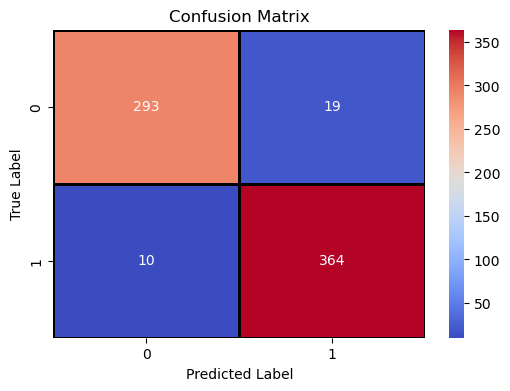


 ForKNeighborsClassifier, Accuracy Score is 0.892128279883382 

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       312
           1       0.90      0.90      0.90       374

    accuracy                           0.89       686
   macro avg       0.89      0.89      0.89       686
weighted avg       0.89      0.89      0.89       686



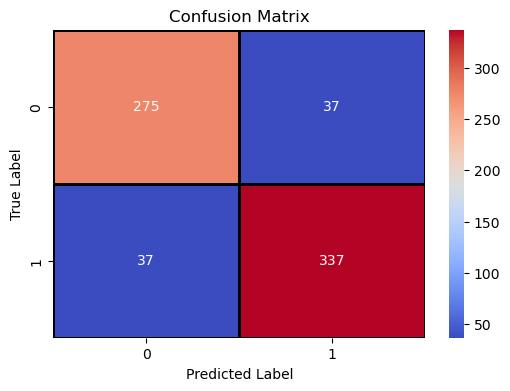

In [89]:
for model in models:
    trainer(model, X_train, y_train, X_valid, y_valid)

## Observation
Using Confusion Matrix it is observed that:
- Decision Tree give us a 89% Accuracy, 88% Precision, 88% Recall and 88% f-1 Score
- K- Neighbour on the other hand gave us 96% Accuracy, 94% Precision, 97% Recall and 95% f-1 Score
    
The Confusion Matrix for Dcision Tree depicts the rate of true positives with respect to the rate of false positives, therefore highlighting the sensitivity of the classifier model. The higher the range, the better the performance of the model at distinguishing between the positive and negative classes.

### Using K-Fold Cross Validation:

- Decision Tree
- K-Neigbour

Importing Neccessary Libraries

In [92]:
from numpy import mean
from numpy import std
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score, cross_val_predict 

In [95]:
# Prepare the cross-Validation procedure
cv = KFold(n_splits = 10, random_state = 1, shuffle = True)

In [96]:

def trainer_with_cv(model, X, y):
    '''Cross Validation function. Expects a model'''
    scores = cross_val_score(model, X, y, scoring = 'accuracy', cv = cv, n_jobs = -1) # evaluate model
    
    print('Accuracy: %.3f' % (mean(scores)))

In [97]:
for model in models:
    trainer_with_cv(model, X_train, y_train)

Accuracy: 0.961
Accuracy: 0.901


In [98]:
def trainer_with_cv(model, X, y):
    '''Cross Validation function. Expect a model'''
    scores = cross_val_score(model, X, y, scoring = 'recall', cv = cv, n_jobs = -1) # evaluate model 
    
    print('Recall: %.3f' % (mean(scores)))

In [99]:
for model in models:
    trainer_with_cv(model, X_train, y_train)

Recall: 0.962
Recall: 0.904


In [100]:
def trainer_with_cv(model, X, y):
    '''Cross Validation function. Expect a model'''
    scores = cross_val_score(model, X, y, scoring = 'precision', cv = cv, n_jobs = -1) # evaluate model 
    
    print('Precision: %.3f' % (mean(scores)))

In [101]:
for model in models:
    trainer_with_cv(model, X_train, y_train)

Precision: 0.956
Precision: 0.891


### Observation

KFold shows, 96% Accuracy for Decision Tree, 96% Recall and 96% Precision

And 90% Accuracy for K-Neigbour, 90% Recall and 90% Precision.

## SUMARY
It is safe to conclude that the best model for BLOSSOM BANK UK. Online Payment Fraud Detection is 'DECISION TREE'

#### END